# Project Title : Telco-Customer-Churn Prediction using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. gender
2. customerID
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. DeviceProtection
10. TechSupport
11. StreamingTV
12. StreamingMovies
13. PaperlessBilling
14. TotalCharges
## Ordinal :
15. Contract


## DISCRETE: 
16. SeniorCitizen

## Continuoue
17. MonthlyCharges
18. TotalCharges

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.ensemble import RandomForestClassifier


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
from xgboost import XGBClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
import seaborn as sns

In [16]:
df=pd.read_csv('Telco-Customer-Churn.csv')


In [17]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='gender', ylabel='count'>

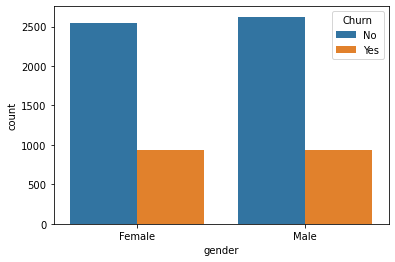

In [21]:
sns.countplot(x='gender',data=df,hue='Churn')

In [22]:
df.groupby("gender")['Churn'].value_counts()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

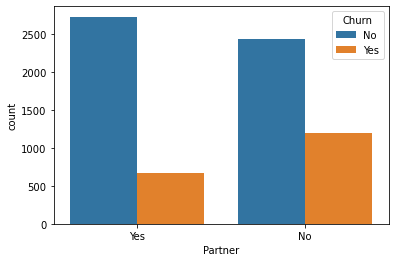

In [23]:
sns.countplot(x='Partner',hue='Churn',data=df)

In [24]:
df.groupby("Partner")['Churn'].value_counts()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

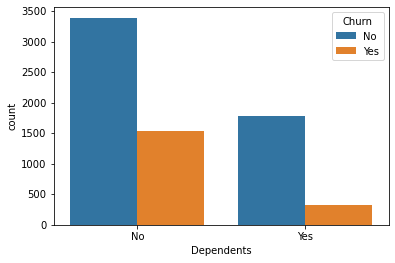

In [25]:
sns.countplot(x=df['Dependents'],hue=df['Churn'])

In [26]:
df.groupby("Dependents")['Churn'].value_counts()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='count'>

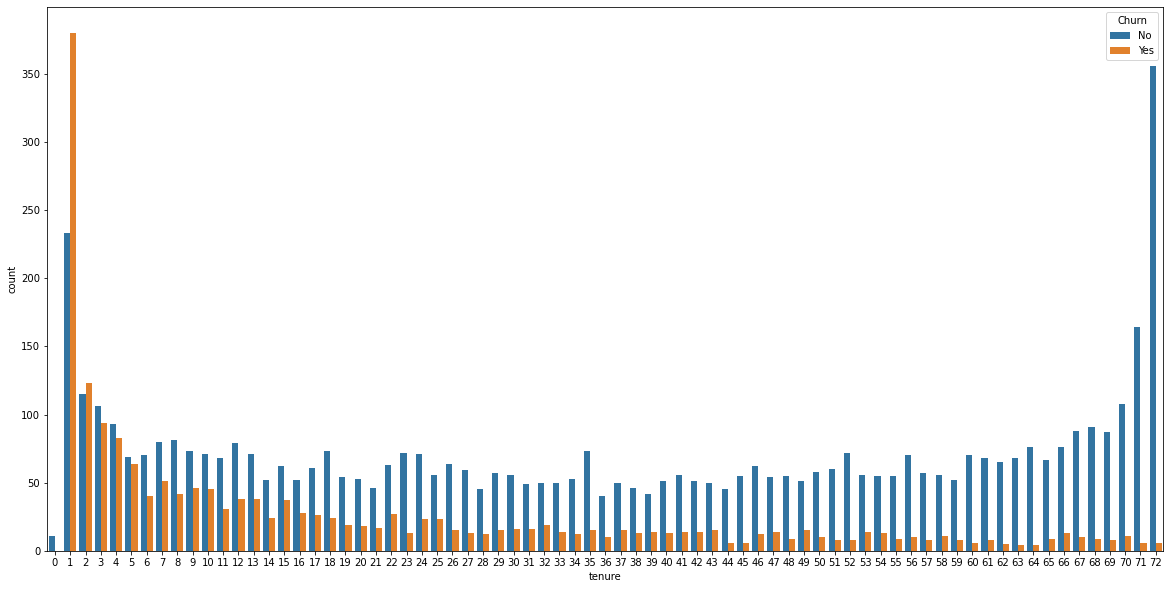

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['tenure'],hue=df['Churn'])


In [28]:
df.groupby("tenure")['Churn'].value_counts()

tenure  Churn
0       No        11
1       Yes      380
        No       233
2       Yes      123
        No       115
                ... 
70      Yes       11
71      No       164
        Yes        6
72      No       356
        Yes        6
Name: Churn, Length: 145, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

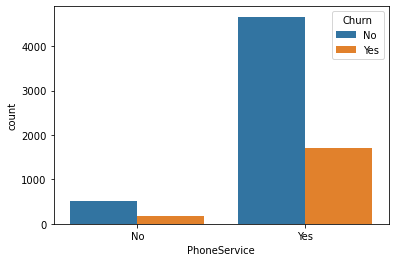

In [29]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

In [30]:
df.groupby("PhoneService")['Churn'].value_counts()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

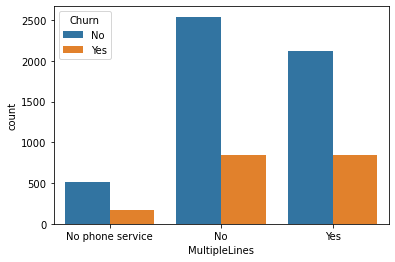

In [31]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

In [32]:
df.groupby("MultipleLines")['Churn'].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

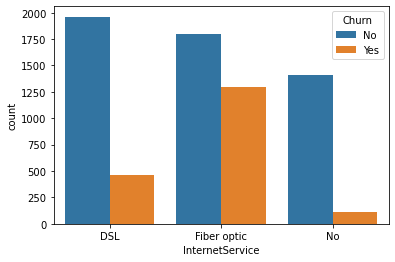

In [33]:
sns.countplot(x='InternetService',hue='Churn',data=df)

In [34]:
df.groupby("InternetService")['Churn'].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

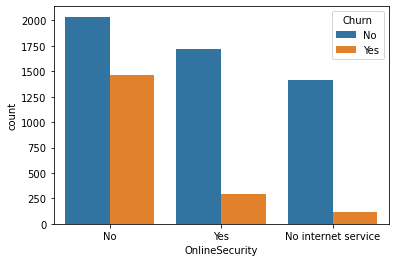

In [35]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)

In [36]:
df.groupby("OnlineSecurity")['Churn'].value_counts()

OnlineSecurity       Churn
No                   No       2037
                     Yes      1461
No internet service  No       1413
                     Yes       113
Yes                  No       1724
                     Yes       295
Name: Churn, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

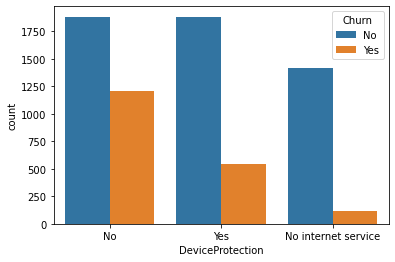

In [37]:
sns.countplot(x='DeviceProtection',hue='Churn',data=df)

In [38]:
df.groupby("DeviceProtection")['Churn'].value_counts()

DeviceProtection     Churn
No                   No       1884
                     Yes      1211
No internet service  No       1413
                     Yes       113
Yes                  No       1877
                     Yes       545
Name: Churn, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

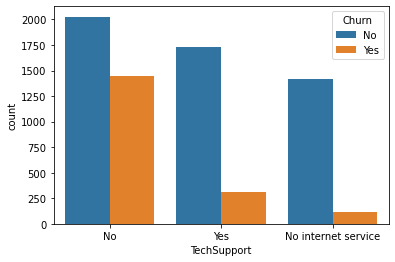

In [39]:
sns.countplot(x='TechSupport',hue='Churn',data=df)

In [40]:
df.groupby("TechSupport")['Churn'].value_counts()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

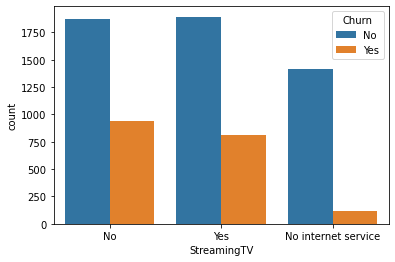

In [41]:
sns.countplot(x=df['StreamingTV'],hue=df['Churn'])

In [42]:
df.groupby("StreamingTV")['Churn'].value_counts()

StreamingTV          Churn
No                   No       1868
                     Yes       942
No internet service  No       1413
                     Yes       113
Yes                  No       1893
                     Yes       814
Name: Churn, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

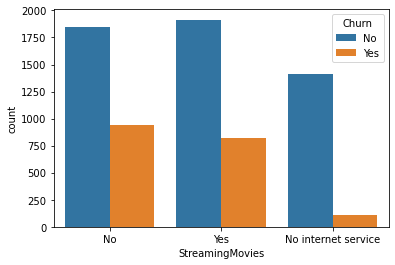

In [43]:
sns.countplot(x=df['StreamingMovies'],hue=df['Churn'])

In [44]:
df.groupby("StreamingMovies")['Churn'].value_counts()

StreamingMovies      Churn
No                   No       1847
                     Yes       938
No internet service  No       1413
                     Yes       113
Yes                  No       1914
                     Yes       818
Name: Churn, dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

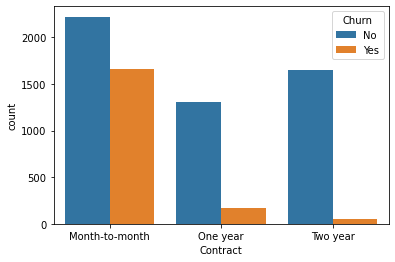

In [45]:
sns.countplot(df['Contract'],hue=df['Churn'])

In [46]:
df.groupby("Contract")['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

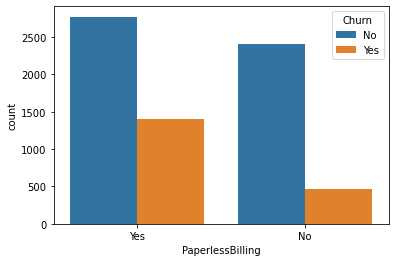

In [47]:
sns.countplot(x=df['PaperlessBilling'],hue=df['Churn'])

In [48]:
df.groupby("PaperlessBilling")['Churn'].value_counts()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: Churn, dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

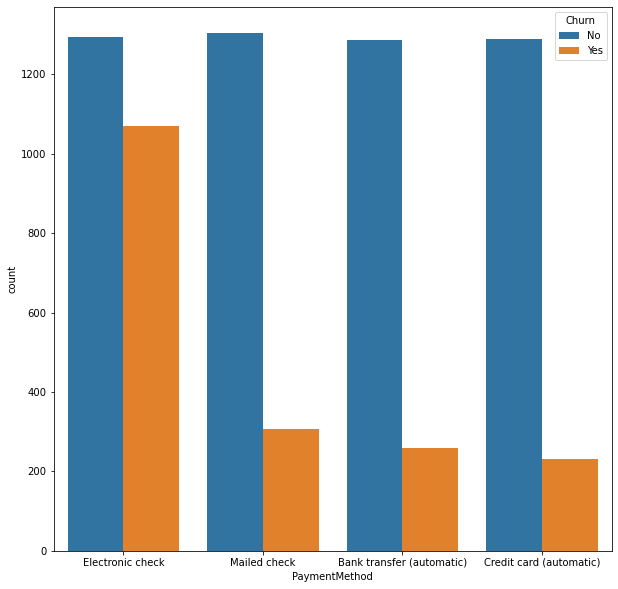

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

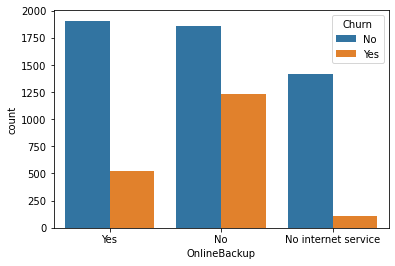

In [50]:
sns.countplot(x=df['OnlineBackup'],hue=df['Churn'])

In [51]:
df.groupby("OnlineBackup")['Churn'].value_counts()

OnlineBackup         Churn
No                   No       1855
                     Yes      1233
No internet service  No       1413
                     Yes       113
Yes                  No       1906
                     Yes       523
Name: Churn, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

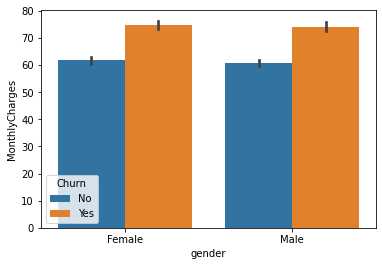

In [52]:
sns.barplot(x='gender',y='MonthlyCharges',data=df,hue='Churn')

In [53]:
df.groupby(["gender","Churn"])['MonthlyCharges'].mean()

gender  Churn
Female  No       61.664908
        Yes      74.812087
Male    No       60.876914
        Yes      74.066989
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

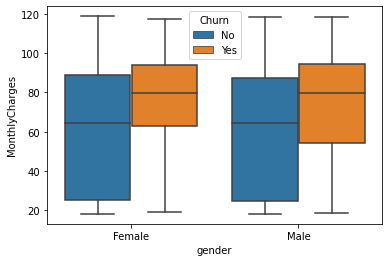

In [54]:
sns.boxplot(x=df['gender'],y=df['MonthlyCharges'],hue=df['Churn'])

<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

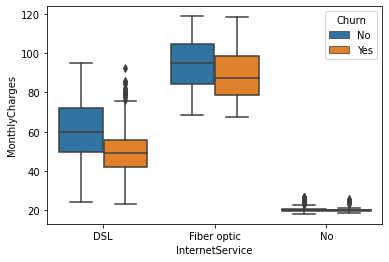

In [55]:
sns.boxplot(x=df['InternetService'],y=df['MonthlyCharges'],hue=df['Churn'])

In [56]:
df.groupby(["InternetService","Churn"])['MonthlyCharges'].mean()

InternetService  Churn
DSL              No       60.212105
                 Yes      49.083224
Fiber optic      No       93.932379
                 Yes      88.126484
No               No       21.136058
                 Yes      20.368142
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

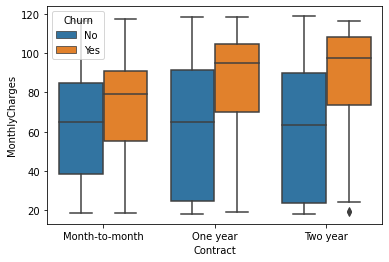

In [57]:
sns.boxplot(x=df['Contract'],y=df['MonthlyCharges'],hue=df['Churn'])

In [58]:
df.groupby(["Contract","Churn"])['MonthlyCharges'].mean()

Contract        Churn
Month-to-month  No       61.462635
                Yes      73.019396
One year        No       62.508148
                Yes      85.050904
Two year        No       60.012477
                Yes      86.777083
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='PaymentMethod', ylabel='MonthlyCharges'>

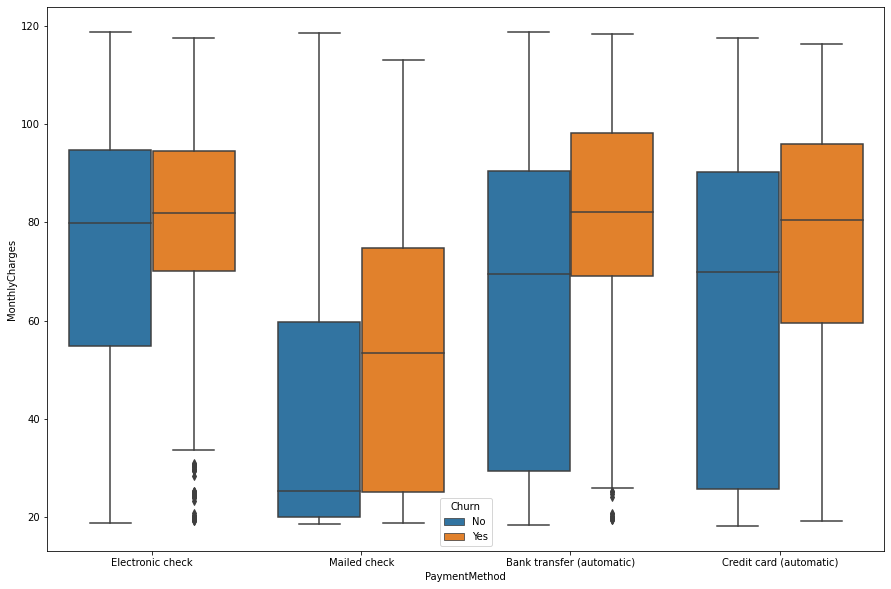

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['PaymentMethod'],y=df['MonthlyCharges'],hue=df['Churn'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='MonthlyCharges'>

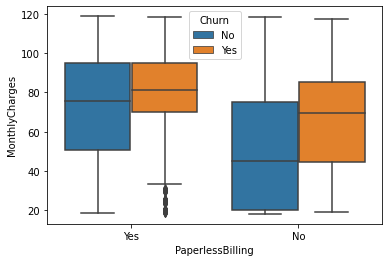

In [60]:
sns.boxplot(x=df['PaperlessBilling'],y=df['MonthlyCharges'],hue=df['Churn'])

In [61]:
df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].mean()

PaperlessBilling  Churn
No                No       49.813962
                  Yes      63.157463
Yes               No       71.195525
                  Yes      78.221429
Name: MonthlyCharges, dtype: float64

In [62]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [63]:
def Convert(val):
    val=str(val)
    
    if val=="\n":
        return float(0)
    elif val==" ":
        return float(0)
    else:
        return float(val)

In [64]:
df['TotalCharges']=df['TotalCharges'].apply(Convert)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

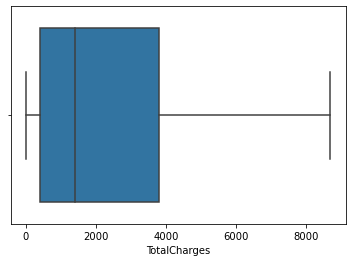

In [65]:
sns.boxplot(df['TotalCharges'])

In [66]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

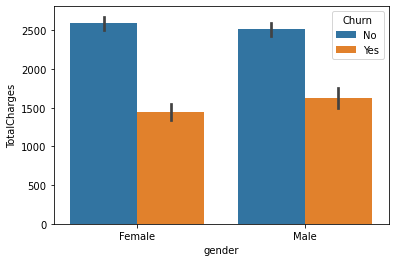

In [67]:
sns.barplot(x='gender',y='TotalCharges',data=df,hue='Churn')

In [68]:
df.groupby(["gender","Churn"])['TotalCharges'].mean()

gender  Churn
Female  No       2588.966046
        Yes      1440.979499
Male    No       2511.987562
        Yes      1623.491559
Name: TotalCharges, dtype: float64

<AxesSubplot:>

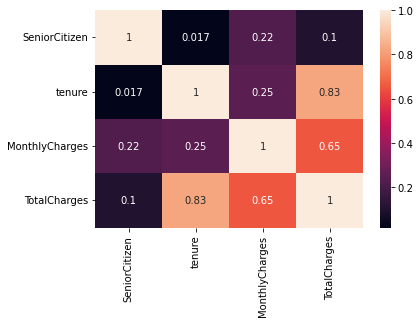

In [69]:
sns.heatmap(df.corr(),annot=True)

In [70]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

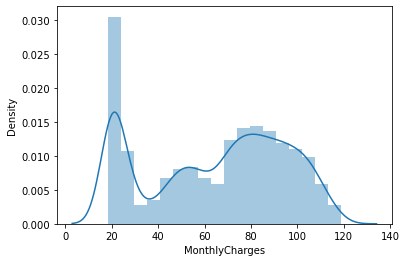

In [71]:
sns.distplot(df['MonthlyCharges'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

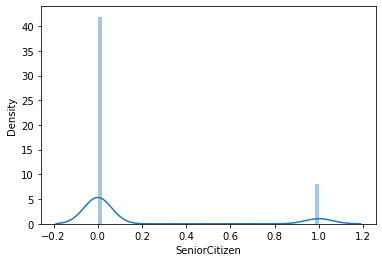

In [72]:
sns.distplot(df['SeniorCitizen'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

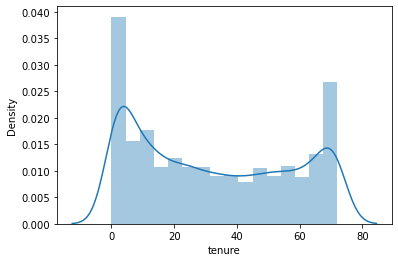

In [73]:
sns.distplot(df['tenure'])

In [74]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='PaperlessBilling', ylabel='TotalCharges'>

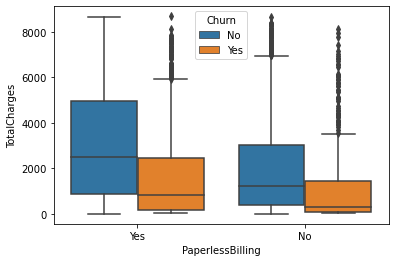

In [75]:
sns.boxplot(x=df['PaperlessBilling'],y=df['TotalCharges'],hue=df['Churn'])

In [76]:
df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].mean()

PaperlessBilling  Churn
No                No       1973.377216
                  Yes      1196.915991
Yes               No       3049.879592
                  Yes      1643.980929
Name: TotalCharges, dtype: float64

<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

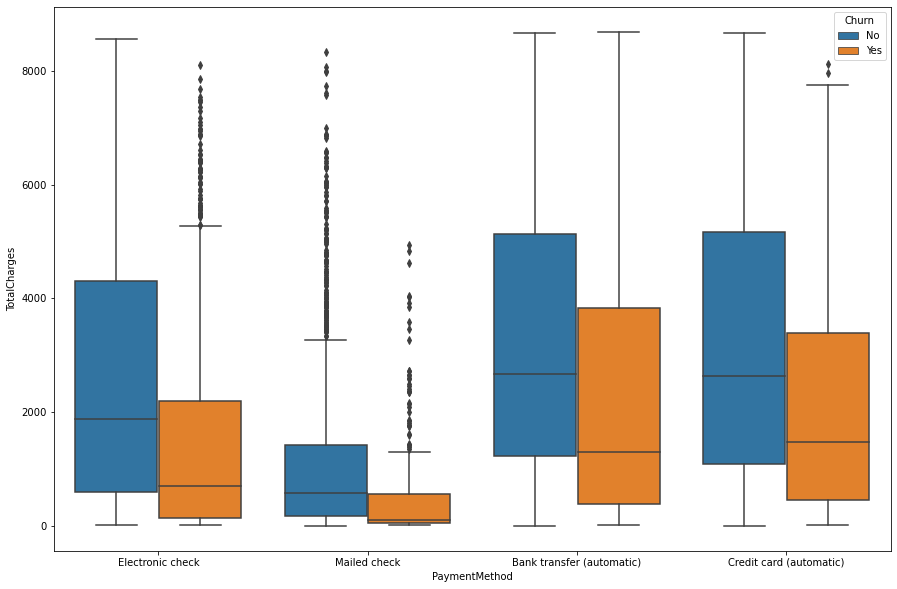

In [77]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['PaymentMethod'],y=df['TotalCharges'],hue=df['Churn'])

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

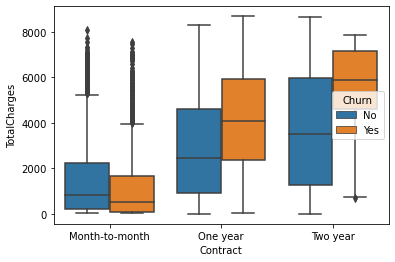

In [78]:
sns.boxplot(x=df['Contract'],y=df['TotalCharges'],hue=df['Churn'])

In [79]:
df.groupby(["Contract","Churn"])['TotalCharges'].mean()

Contract        Churn
Month-to-month  No       1521.927590
                Yes      1164.460574
One year        No       2901.348355
                Yes      4066.212048
Two year        No       3656.648604
                Yes      5432.363542
Name: TotalCharges, dtype: float64

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

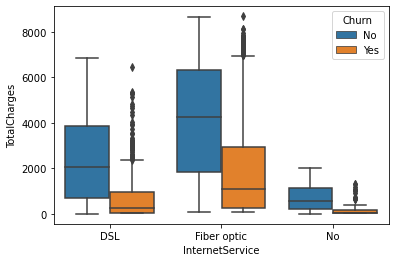

In [80]:
sns.boxplot(x=df['InternetService'],y=df['TotalCharges'],hue=df['Churn'])

In [81]:
df.groupby(["InternetService","Churn"])['TotalCharges'].mean()

InternetService  Churn
DSL              No       2426.806498
                 Yes       784.349673
Fiber optic      No       4135.834074
                 Yes      1914.616384
No               No        701.685740
                 Yes       173.919912
Name: TotalCharges, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

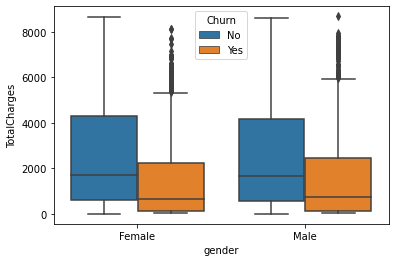

In [82]:
sns.boxplot(x=df['gender'],y=df['TotalCharges'],hue=df['Churn'])

In [83]:
df.groupby(["gender","Churn"])['TotalCharges'].mean()

gender  Churn
Female  No       2588.966046
        Yes      1440.979499
Male    No       2511.987562
        Yes      1623.491559
Name: TotalCharges, dtype: float64

In [84]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [85]:
le=LabelEncoder()


In [86]:
df['gender']=le.fit_transform(df['gender'])


In [87]:
df['Partner']=le.fit_transform(df['Partner'])


In [88]:
df['Dependents']=le.fit_transform(df['Dependents'])


In [89]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [90]:
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

In [91]:
df['InternetService']=le.fit_transform(df['InternetService'])

In [92]:
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])

In [93]:
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])

In [94]:
df['TechSupport']=le.fit_transform(df['TechSupport'])

In [95]:
df['StreamingTV']=le.fit_transform(df['StreamingTV'])

In [96]:
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])

In [97]:
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])

In [98]:
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [99]:
df['Contract']=le.fit_transform(df['Contract'])

In [100]:
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])

In [101]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,No
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,No
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,No
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,Yes


In [102]:
df.drop('customerID',axis=1,inplace=True)

In [103]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,Yes


In [104]:
y=df['Churn']

In [105]:
X=df.drop('Churn',axis=1)

In [106]:
sc=StandardScaler()

In [107]:
X=sc.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [109]:
X_train.shape

(5634, 19)

In [110]:
lr=LogisticRegression()

In [111]:
lr.fit(X_train,y_train)

LogisticRegression()

In [112]:
y_pred=lr.predict(X_test)


In [113]:
accuracy_score(y_test,y_pred)

0.815471965933286

In [114]:
confusion_matrix(y_test,y_pred)

array([[933, 103],
       [157, 216]], dtype=int64)

In [115]:
rfc=RandomForestClassifier()


In [116]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [117]:
y_pred=rfc.predict(X_test)


In [118]:
accuracy_score(y_test,y_pred)

0.7920511000709723

In [119]:
rfc.predict_proba(X_test)

array([[0.2 , 0.8 ],
       [0.91, 0.09],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.43, 0.57]])

In [120]:
confusion_matrix(y_test,y_pred)

array([[941,  95],
       [198, 175]], dtype=int64)

In [121]:
dtc=DecisionTreeClassifier()


In [122]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
y_pred=dtc.predict(X_test)


In [124]:
accuracy_score(y_test,y_pred)

0.7260468417317246

In [125]:
dtc.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [126]:
confusion_matrix(y_test,y_pred)

array([[839, 197],
       [189, 184]], dtype=int64)

In [127]:
knc=KNeighborsClassifier()


In [128]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [129]:
y_pred=knc.predict(X_test)


In [130]:
accuracy_score(y_test,y_pred)

0.7572746628814763

In [131]:
knc.predict_proba(X_test)

array([[0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6]])

In [132]:
confusion_matrix(y_test,y_pred)

array([[879, 157],
       [185, 188]], dtype=int64)

In [133]:
gbc=GradientBoostingClassifier()


In [134]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [135]:
y_pred=gbc.predict(X_test)


In [136]:
accuracy_score(y_test,y_pred)

0.8090844570617459

In [137]:
confusion_matrix(y_test,y_pred)

array([[941,  95],
       [174, 199]], dtype=int64)

In [138]:
gbc.predict_proba(X_test)

array([[0.27246973, 0.72753027],
       [0.89817144, 0.10182856],
       [0.98236547, 0.01763453],
       ...,
       [0.94166405, 0.05833595],
       [0.96649641, 0.03350359],
       [0.33785254, 0.66214746]])